<a href="https://colab.research.google.com/github/NethmiJayasinghe/FYP-Image-Classification/blob/main/Toy_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing Libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import sequential
from keras.layers.core import Dense,Flatten,Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import scipy
from skimage.transform import resize
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.style.use('fivethirtyeight')
from PIL import Image

In [ ]:
for (dirpath, dirnames, filenames) in os.walk("/content/ImageSet/Folded Papers"):     #change images from jpeg to png
  for i in range(300):
    im1=Image.open(dirpath+"/"+filenames[i])
    im1.save(r'/content/ImageSet/Folded Paper/new'+str(i)+'.png')

In [ ]:
def makedata(a):           #Function to read and resize image
  try:
    img=mpimg.imread(a)
    res = resize(img, (64,64))
    return res
  except:
    pass

datasetnames=[]
for i in range (17):
  datasetnames+=["dataset"+str(i)]
print (len(datasetnames))

foldernames=["Building Blocks","Dinosaur","Elephant Stuffed","Pencils","Unicorn","Airplane","Teddy Bear","Balls","Toy Cars","Toy Trucks","Telephone","Tea Cup","Cubes","Lion","Toy Boat","Folded Paper","Empty Bottles"]
for i in range(17):
  dataset1=[]
  for (dirpath, dirnames, filenames) in os.walk("/content/ImageSet/"+foldernames[i]):   #getting images from the folder
    A=len(filenames)
    for j in range(A):
      singledata=makedata(dirpath+"/"+filenames[j]) 
      try:                                                                   #resizing each image
        if singledata.shape == (64,64,3):                                    #reshaping images to store
          dataset1.append(singledata)
      except:
        pass
  
  datasetnames[i] = np.array(dataset1)

print (datasetnames[4].shape)

17
(300, 64, 64, 3)


In [ ]:
for i in range(17):
  np.savez("dataset"+str(i)+".npz",X=datasetnames[i])

In [ ]:
data=np.load("/content/dataset0.npz") 
x0=np.array(data["X"]/255)
data=np.load("/content/dataset1.npz") 
x1=np.array(data["X"]/255)
data=np.load("/content/dataset2.npz") 
x2=np.array(data["X"]/255)
data=np.load("/content/dataset3.npz") 
x3=np.array(data["X"]/255)
data=np.load("/content/dataset4.npz") 
x4=np.array(data["X"]/255)
data=np.load("/content/dataset5.npz") 
x5=np.array(data["X"]/255)
data=np.load("/content/dataset6.npz") 
x6=np.array(data["X"]/255)
data=np.load("/content/dataset7.npz") 
x7=np.array(data["X"]/255)
data=np.load("/content/dataset8.npz") 
x8=np.array(data["X"]/255)
data=np.load("/content/dataset9.npz") 
x9=np.array(data["X"]/255)
data=np.load("/content/dataset10.npz") 
x10=np.array(data["X"]/255)
data=np.load("/content/dataset11.npz") 
x11=np.array(data["X"]/255)
data=np.load("/content/dataset12.npz") 
x12=np.array(data["X"]/255)
data=np.load("/content/dataset13.npz") 
x13=np.array(data["X"]/255)
data=np.load("/content/dataset14.npz") 
x14=np.array(data["X"]/255)
data=np.load("/content/dataset15.npz") 
x15=np.array(data["X"]/255)
data=np.load("/content/dataset16.npz") 
x16=np.array(data["X"]/255)


In [ ]:
print (x16.shape)

(300, 64, 64, 3)


In [ ]:
xx1 = np.concatenate((x0,x1,x2))
xx2 = np.concatenate((x3,x4,x5))
xx3 = np.concatenate((x6,x7,x8))
xx4 = np.concatenate((x9,x10,x11))
xx5 = np.concatenate((x12,x13,x14))
xx6 = np.concatenate((x15,x16))
xx7 = np.concatenate((xx1,xx2,xx3))
xx8 = np.concatenate((xx4,xx5,xx6))

Xdata = np.concatenate((xx7,xx8))

In [ ]:
print (x0[10])

AxesImage(34.56,20.16;375.84x233.28)


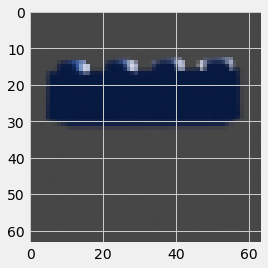

In [ ]:
img = plt.imshow(x0[10]*255)        #check assign label with an image
print(img)

In [ ]:
Yzeros= np.zeros(300,float)            #make array of zeros

Yones= np.ones(300,float)            #make array of zeros

In [ ]:
twos=Yones+Yones
threes = twos+Yones
fours= threes+Yones
fives = fours+Yones
sixes = fives+Yones
sevens = sixes+Yones
eights = sevens +Yones
nines = eights +Yones
tens = nines + Yones
elevens = tens + Yones
twelews = elevens + Yones
thirteens = twelews + Yones
Fourteens = thirteens + Yones
Fifteens = Fourteens + Yones
Sixteens = Fifteens + Yones
r=np.concatenate((Yzeros,Yones,twos,threes,fours,fives,sixes,sevens,eights,nines,tens,elevens, twelews,thirteens,Fourteens, Fifteens, Sixteens))
Ydata=r.reshape(5100,1)

In [ ]:
c= np.arange(Xdata.shape[0])    #Shuffle both datasets in same order
np.random.shuffle(c)

Xdata = Xdata[c]
Ydata = Ydata[c]

Cubes


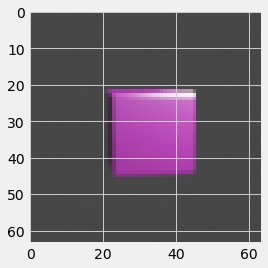

In [ ]:
img = plt.imshow(Xdata[200]*255)        #check assign label with an image
print(foldernames[int(Ydata[200])])

In [ ]:
x_train = Xdata[0:4080]         
x_test = Xdata[4080:5100]
y_train = Ydata[0:4080]
y_test = Ydata[4080:5100]
print(x_train.shape)                   #Check datatype
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4080, 64, 64, 3)
(1020, 64, 64, 3)
(4080, 1)
(1020, 1)


In [ ]:
Classification=["Building Blocks","Dinosaur","Elephant Stuffed","Pencils","Unicorn","Airplane","Teddy Bear","Balls","Toy Cars","Toy Trucks","Telephone","Tea Cup","Cubes","Lion","Toy Boat","Folded Papers","Empty Bottles"]         #Data labels
y_train_one = to_categorical(y_train)                     #make y dataset to asign data labels
y_test_one = to_categorical(y_test)
print(y_train_one[3])
print(y_test_one.shape)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
(1020, 17)


In [ ]:
print(y_train[6])
print(y_train_one[6])

[4.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
#create the model architecture
model = tf.keras.Sequential()
#Add first layer
model.add(Conv2D(64,(5,5), activation = 'relu', input_shape=(64,64,3)))
#Add pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
#Add another convolutional layer
model.add(Conv2D(64,(5,5), activation = 'relu'))
#Add another pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
#Add a flattening layer
model.add(Flatten())

model.add(Dense(500, activation = 'relu'))
#Add a dropout layer
model.add(Dropout(0.5))
#Add a layer with 250 neurons
model.add(Dense(250, activation = 'relu'))
#Add a layer with 17 neurons
model.add(Dense(17, activation = 'softmax'))

In [ ]:
#Compile the model
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
#Train the model
hist = model.fit(x_train, y_train_one, batch_size = 256, epochs = 15, validation_split = 0.2)

In [ ]:
#Evaluate the model using test data set
model.evaluate(x_test, y_test_one)[1]

32/32 [==============================] - 4s 116ms/step - loss: 0.5670 - accuracy: 0.8324


0.8323529362678528

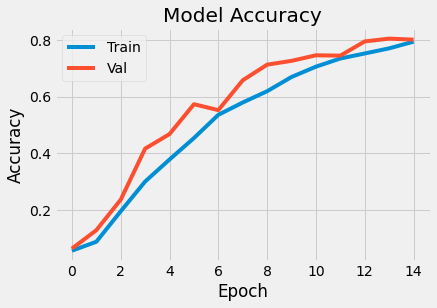

In [ ]:
#Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

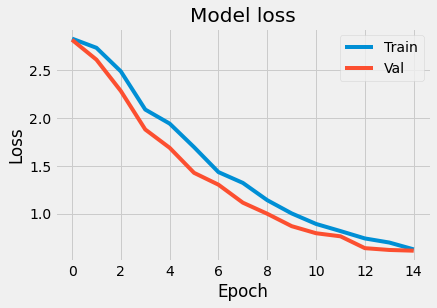

In [ ]:
#Visualizing the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
#Test the model with an example
from google.colab import files
uploaded = files.upload()

Saving 0001_L.png to 0001_L (1).png


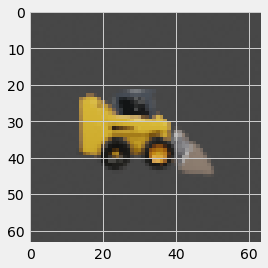

In [ ]:
new_image = plt.imread('0001_L (1).png')
img=plt.imshow(new_image)

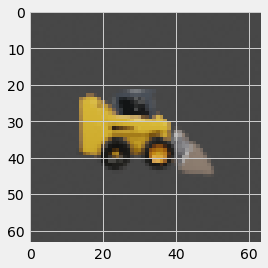

In [ ]:
#Resize the image
from skimage.transform import resize
resized_image = resize(new_image,(64,64,3))/255
img = plt.imshow(resized_image*255)

In [ ]:
#Get the models predictions
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(np.array([resized_image]))
#Show the predictions
predictions

array([[0.05349347, 0.053494  , 0.0534934 , 0.0534934 , 0.0534934 ,
        0.0534934 , 0.05349354, 0.0534934 , 0.05372817, 0.14333333,
        0.05351488, 0.05351184, 0.05349497, 0.05349749, 0.05397847,
        0.0534994 , 0.0534934 ]], dtype=float32)

In [ ]:
index=int(np.argmax(predictions,axis=1))
print(Classification[index])

Toy Trucks


In [ ]:
list_index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
for i in range(17):
  print(Classification[list_index[i]],':', round(predictions[0][list_index[i]]*100,2), '%')



Building Blocks : 5.35 %
Dinosaur : 5.35 %
Elephant Stuffed : 5.35 %
Pencils : 5.35 %
Unicorn : 5.35 %
Airplane : 5.35 %
Teddy Bear : 5.35 %
Balls : 5.35 %
Toy Cars : 5.37 %
Toy Trucks : 14.33 %
Telephone : 5.35 %
Tea Cup : 5.35 %
Cubes : 5.35 %
Lion : 5.35 %
Toy Boat : 5.4 %
Folded Papers : 5.35 %
Empty Bottles : 5.35 %
